# Import Required Libraries 

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Problem Statement

# 2. Data Gathering

In [ ]:
iris_df = pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_df.shape

(150, 6)

In [ ]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 3. Exploratory Data Analysis

In [ ]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris_df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


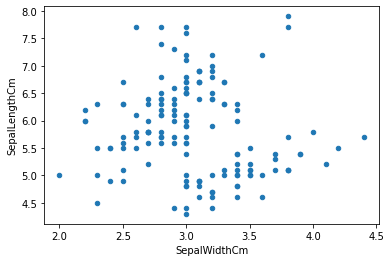

In [ ]:
iris_df.plot(x = 'SepalWidthCm',y = 'SepalLengthCm', kind = 'scatter')

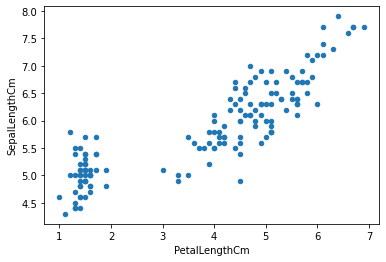

In [ ]:
iris_df.plot(x = 'PetalLengthCm',y = 'SepalLengthCm', kind = 'scatter')

<Figure size 2160x2160 with 0 Axes>

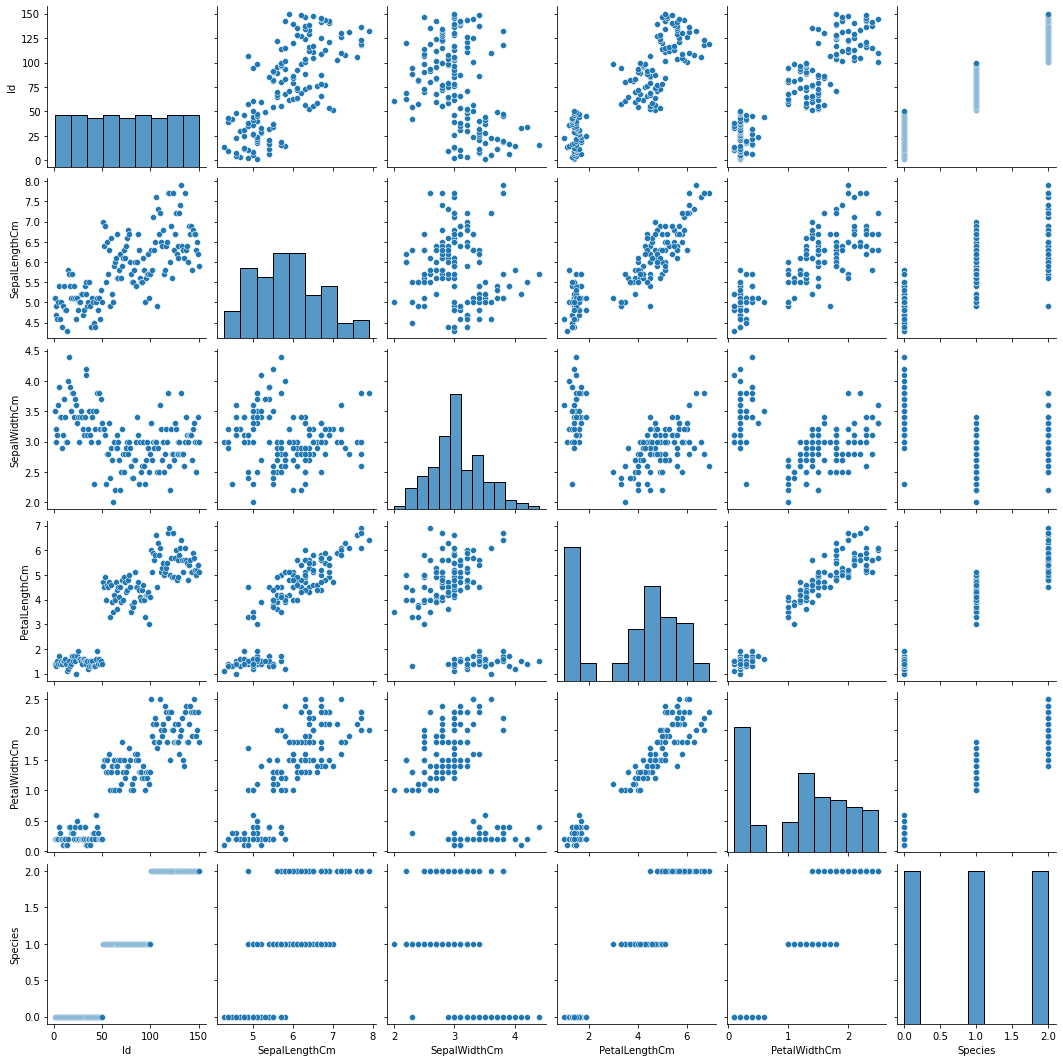

In [ ]:
plt.figure(figsize = (30,30))
sns.pairplot(iris_df, kind = 'scatter')

In [ ]:
# sns.pairplot(iris_df, kind = 'scatter', hue = 'Species')

In [ ]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


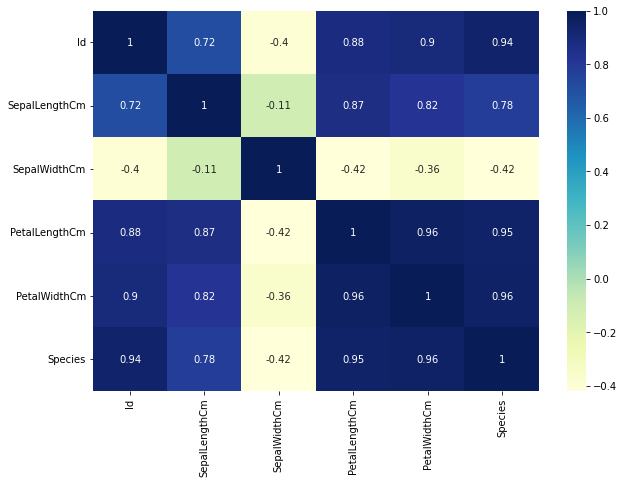

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(iris_df.corr(), annot = True, cmap="YlGnBu")

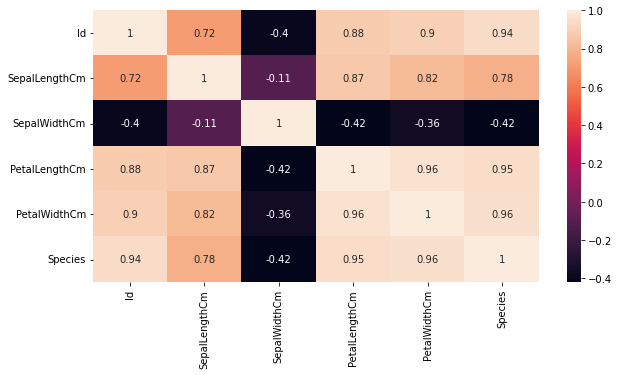

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(iris_df.corr(), annot = True)

# 4. Feature Engineering

# 5. Feature Selection

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
iris_df.drop('Id', axis = 1, inplace = True)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 6. Model Training / Building

### 6.1 Splitting Dataset 

In [ ]:
x = iris_df.drop('SepalLengthCm', axis = 1)
y = iris_df['SepalLengthCm']

In [ ]:
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [ ]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,3.0,4.6,1.4,1
135,3.0,6.1,2.3,2
69,2.5,3.9,1.1,1
128,2.8,5.6,2.1,2
114,2.8,5.1,2.4,2
...,...,...,...,...
133,2.8,5.1,1.5,2
137,3.1,5.5,1.8,2
72,2.5,4.9,1.5,1
140,3.1,5.6,2.4,2


In [ ]:
# 150 >> 120 (Training) + 30 (Testing)

# 6.2 Instantiating Linear Regression Model

In [ ]:
model = LinearRegression()
model

LinearRegression()

# 6.3 Model Training

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

# 7. Model Evaluation

### 7.1 Prediction

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147,
       6.58803407, 6.08751945, 5.47306316, 4.97011483, 6.65064945,
       5.96358461, 5.36185069, 6.79865775, 6.40915979, 6.23704035,
       4.7172364 , 5.78471033, 6.2944135 , 4.90639933, 4.63294359,
       6.12188157, 6.2944135 , 6.62170856, 4.84227135, 7.13895033,
       5.93666494, 5.37526068, 5.18297641, 6.48950629, 5.84732571])

In [ ]:
y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
56     6.3
141    6.9
44     5.1
29     4.7
120    6.9
94     5.6
5      5.4
102    7.1
51     6.4
78     6.0
42     4.4
92     5.8
66     5.6
31     5.4
35     5.0
90     5.5
84     5.4
77     6.7
40     5.0
125    7.2
99     5.7
33     5.5
19     5.1
73     6.1
146    6.3
Name: SepalLengthCm, dtype: float64

# Mean Squared Error

In [ ]:
MSE = mean_squared_error(y_test,y_pred_test)
print('Mean squared is :', MSE)

Mean squared is : 0.15781531046414632


In [ ]:
MSE = mean_squared_error(y_pred_test,y_test)
print('Mean squared is :', MSE)

Mean squared is : 0.15781531046414632


# RMSE

In [ ]:
rmse = np.sqrt(MSE)
print('Root mean squared error :', rmse)

Root mean squared error : 0.3972597518804873


# MAE

In [ ]:
mean_absolute_error(y_pred_test,y_test)

0.3232781241570911

# R2Score

In [ ]:
r2score = r2_score(y_pred_test,y_test)
r2score    # Considerable 

0.7375923796161155

In [ ]:
r2score = r2_score(y_test,y_pred_test)
r2score

0.7588110183264588